<a href="https://colab.research.google.com/github/himanshkr03/Data_Visualization_Experiment/blob/main/Data_Visualization_exp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

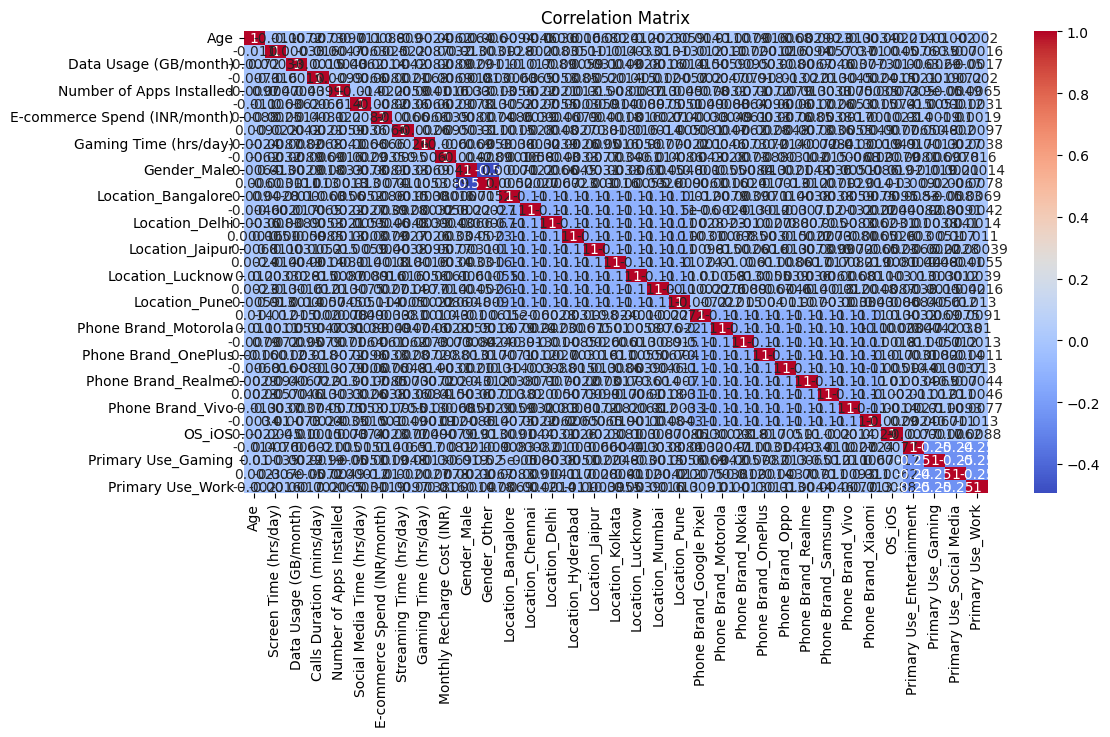

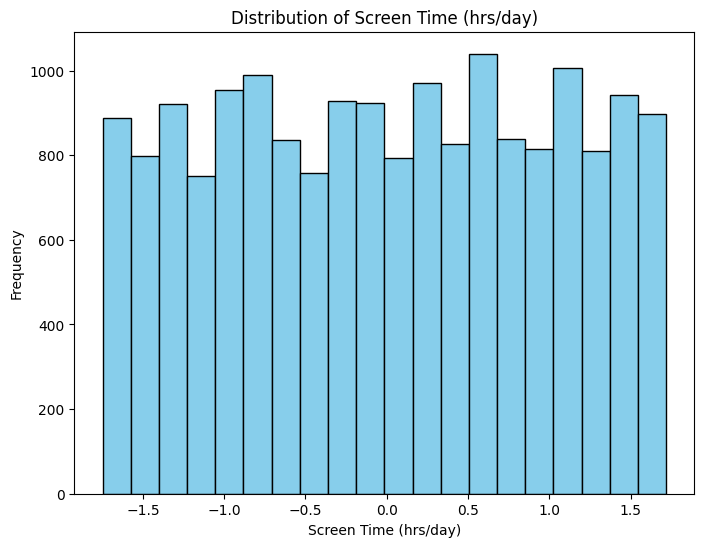


Root Mean Squared Error (RMSE): 0.9937831723787833

Sample Future Predictions:
[ 0.08331011  0.07340989 -0.01400116  0.03533914  0.02043999]


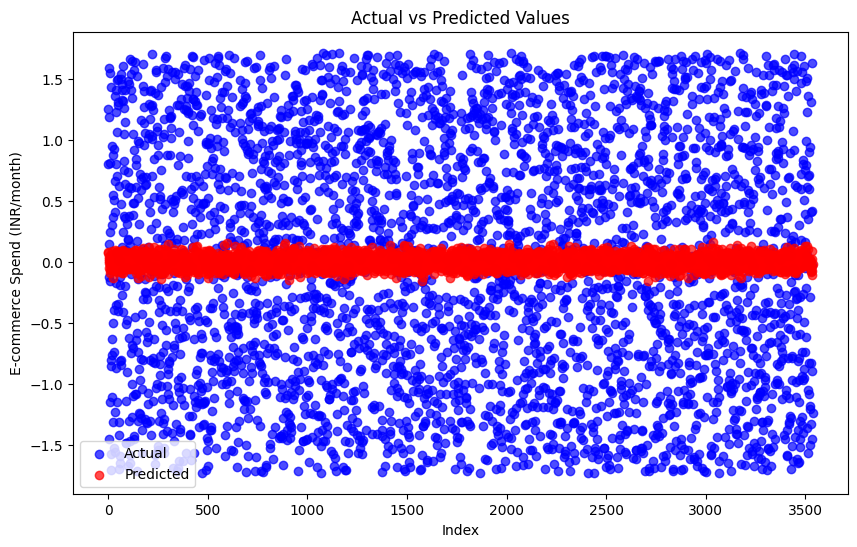

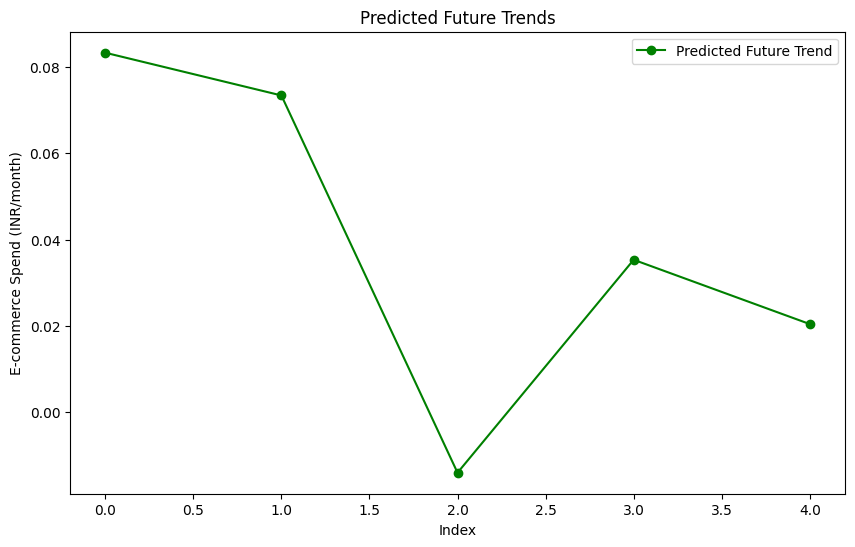

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Read the dataset
file_path = '/content/phone_usage_india.csv'  # Replace with your uploaded file's path
data = pd.read_csv(file_path)

# Step 2: Data Cleaning and Preprocessing
# Inspecting the dataset
data.info()
print("\nFirst few rows of the dataset:")
print(data.head())

# Handling missing values (if any)
data = data.dropna()  # Drop rows with missing values

# Encoding categorical columns
categorical_columns = ['Gender', 'Location', 'Phone Brand', 'OS', 'Primary Use']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Feature scaling (normalization for numeric columns)
numeric_columns = ['Age', 'Screen Time (hrs/day)', 'Data Usage (GB/month)',
                    'Calls Duration (mins/day)', 'Number of Apps Installed',
                    'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
                    'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)']
data[numeric_columns] = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()

# Step 3: Analyze Data Patterns
# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

# Visualizations
plt.figure(figsize=(12, 6))
# Exclude 'User ID' column from correlation calculation
sns.heatmap(data.drop(columns=['User ID']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
data['Screen Time (hrs/day)'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Screen Time (hrs/day)')
plt.xlabel('Screen Time (hrs/day)')
plt.ylabel('Frequency')
plt.show()

# Step 4: Split Data into Training and Testing Sets
X = data.drop(['E-commerce Spend (INR/month)', 'User ID'], axis=1)  # Features, Drop User ID column
y = data['E-commerce Spend (INR/month)']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Machine Learning Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Test the Model
predictions = model.predict(X_test)

# Step 7: Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")

# Step 8: Predict Future Trends
# Example prediction using sample data
sample_data = X_test.iloc[0:5]  # Replace with new data if available
future_predictions = model.predict(sample_data)
print("\nSample Future Predictions:")
print(future_predictions)

# Step 9: Visualize Prediction Results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.7)
plt.scatter(range(len(predictions)), predictions, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('E-commerce Spend (INR/month)')
plt.legend()
plt.show()

# Prediction trend line visualization
plt.figure(figsize=(10, 6))
plt.plot(range(len(future_predictions)), future_predictions, label='Predicted Future Trend', marker='o', color='green')
plt.title('Predicted Future Trends')
plt.xlabel('Index')
plt.ylabel('E-commerce Spend (INR/month)')
plt.legend()
plt.show()
